## Rozwiązywanie równań różniczkowych metodami algebry liniowej 

#### Zadanie 1
Zaimplementuj metodą iteracyjną rozwiązywania układów równań Czebyszewa. 

In [1]:
import numpy as np
from scipy.linalg import norm


def chebyshev_method(A, b, n, l_max, l_min, eps=1e-6, N=10):
    c = (l_max - l_min) / 2
    d = (l_max + l_min) / 2
    x = np.zeros(N**2)
    r = b - np.matmul(A, x)
    iterations = 0

    for i in range(1, n+1):
        iterations += 1
        z = np.linalg.solve(A, r)
        alpha = 1

        if i == 1:
            alpha = 1/d
            p = z
        elif i == 2:
            beta = (1/2)*(c*alpha)**2
            alpha = 1/(d - beta/alpha)
            p = z + beta*p
        else:
            beta = (c*alpha/2)**2
            alpha = 1/(d - beta/alpha)
            p = z + beta*p
        x = x + alpha*p
        r = b - np.matmul(A, x)

        if norm(r) < eps:
            return x, iterations

    return x, iterations

#### Zadanie 2
Zapoznaj się z prezentacją dr Rycerz o sposobie rozwiązywaniu równania różniczkowego Poissona dla dwóch wymiarów (metoda różnic skończonych).

Rozwiąż równanie Poissona w przestrzeni 2D. Funkcja rozkładu źródeł ma postać: $$\rho(x,y) = 2 \pi sin(\pi x)sin(\pi y)$$    
Obliczenia dokonujemy w obszarze dwuwymiarowym: $$\Omega = [0,2] \times [0,2]$$ Siatkę proszę dobrać samodzielnie tak by obliczenie nie było zbyt długie (na podstawie wcześniejszy testów metod iteracyjnych).   
Warunki brzegowe: 0 na wszystkich krawędziach. 

Przedstaw sposób konstrukcji układu równań w metodzie różnic skończonych dla tego równiania. Przedstaw rozwiązanie graficznie. 

Rozwiązanie  
Postać równania:  
$\nabla^{2}\varphi(x,y) = -     \rho(x,y)$  

   $\rho(x,y)$ - funkcja rozkładu źródeł (dana w zadaniu),

   $\nabla^{2}$ - operator Laplace'a

Równoważna postać równania:  
$\frac{\partial^{2}*\varphi(x,y)}{\partial*x^{2}}$ + $\frac{\partial^{2}*\varphi(x,y)}{\partial*y^{2}} = -\rho(x,y)$

Warunki brzegowe Dirichleta:  
$\varphi(x,0) = 0$,    
$\varphi(0,y) = 0$,  
$\varphi(x,n+1) = 0, \varphi(n+1,y) = 0$


Pochodne przybliżone różnicami skończonymi (siatka 10x10):  
$\varphi_{i, j} = \varphi(x_{i}, y_{j}),$  
$ i = 1,...10,$  
$j = 1,...10 $,  
$(x_{i}, y_{j})$ - punkty na siatce,  
h = 1 - odstęp między punktami

Konieczne pochodne:  
$\frac{\partial*\varphi_{i,j}}{\partial*x} = \frac{\varphi_{i+1,j}-\varphi_{i-1,j}}{2h} + O(h^{2})$<br> $\frac{\partial^{2}*\varphi_{i,j}}{\partial*x^{2}} = \frac{\varphi_{i+1,j}-2*\varphi_{i,j}+\varphi_{i-1,j}}{h^{2}} + O(h^{2})$<br> $\frac{\partial*\varphi_{i,j}}{\partial*y} = \frac{\varphi_{i,j+1}-\varphi_{i,j-1}}{2h} + O(h^{2})$<br> $\frac{\partial^{2}*\varphi_{i,j}}{\partial*y^{2}} = \frac{\varphi_{i,j+1}-2*\varphi_{i,j}+\varphi_{i,j-1}}{h^{2}} + O(h^{2})$

Postać końcowa po podstawieniach:

$\frac{\varphi(x_{i}, y_{j-1}) + \varphi(x_{i-1}, y_{j}) - 4*\varphi(x_{i}, y_{j}) + \varphi(x_{i+1}, y_{j}) + \varphi(x_{i}, y_{j+1})}{h^{2}} = -\rho(x,y)$


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl


def visualize(N=10):
    AA, n = chebyshev_method(A, b, 1000, 0, 2, eps=1e-10)
    x, y = [], []

    for i in range(1, N+1):
        for j in range(1, N+1):
            x.append(i)
            y.append(j)

    plt.scatter(x, y, c=AA, sizes=[1500 for _ in range(N**2)], alpha=1, cmap=mpl.cm.gray, marker="s")
    plt.colorbar()
    plt.show()


In [3]:
def generate_matrix(N=10):
    A = np.zeros((N**2, N**2))
    for i in range(N**2):
        A[i][i] = -4
        if i - 1 >= 0:
            A[i-1][i] = 1.0
        if i + 1 < N**2:
            A[i+1][i] = 1.0
        if i - N >= 0:
            A[i-N][i] = 1.0
        if i + N < N**2:
            A[i+N][i] = 1.0
    return A

def print_A(A, N=10):
    for i in range(N):
        for j in range(N):
            print(A[i][j], " ", end='')
        print("")

def generate_b_vector(N=10):
    b = np.zeros(N**2)
    n = 0
    for i in range(1, N+1):
        for j in range(1, N+1):
            b[n] = (i + j)/2
            n += 1
    return b

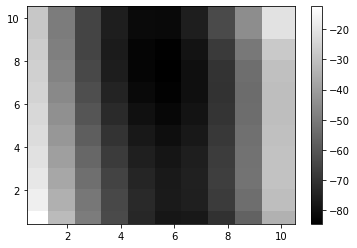


Matrix b:

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  1.5  2.   2.5  3.
  3.5  4.   4.5  5.   5.5  6.   2.   2.5  3.   3.5  4.   4.5  5.   5.5
  6.   6.5  2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   3.   3.5
  4.   4.5  5.   5.5  6.   6.5  7.   7.5  3.5  4.   4.5  5.   5.5  6.
  6.5  7.   7.5  8.   4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5  5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.5 10. ]


Matrix A:

-4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
0.0  0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.

In [4]:
b = generate_b_vector()
A = generate_matrix()
visualize()
print("\nMatrix b:\n")
print(b)
print("\n\nMatrix A:\n")
print_A(A, 15)

#### Zadanie 3
Zastosuj do otrzymanego układu równań metody Gaussa-Seidla, SOR i Czebyszewa. Porównaj zbieżność tych metod. 


In [5]:
def gauss_seidel(A, b, n, eps):
    x = np.zeros_like(b)
    it = 0
    for _ in range(n):
        x_new = np.zeros_like(x)
        it += 1
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, atol=eps, rtol=0):
            return x_new, it
        x = x_new
    return x, it


def sor(A, b, n, eps, omg):
    if omg < 0 or omg > 2:
        raise Exception("Omega must be from range (0, 2)")
    it = 0
    x = np.zeros_like(b)
    x_new = np.zeros_like(x)
    for _ in range(n):
        it += 1
        for i in range(b.shape[0]):
            old_sum = np.dot(A[i, i + 1:], x_new[i + 1:])
            new_sum = np.dot(A[i, :i], x[:i])
            x[i] = (b[i] - (old_sum + new_sum)) / A[i, i]
            x[i] = np.dot(x[i], omg) + np.dot(x_new[i], (1 - omg))
        if np.linalg.norm(np.dot(A, x) - b) < eps:
            return x_new, it
        x_new = x
    return x, it

In [8]:
def compare(n):
    
    b = generate_b_vector(n)
    A = generate_matrix(n)
    
    AA, n = chebyshev_method(A, b, 1000 + 10*n, 0, 2, eps=1e-12, N=n)
    print(f"Chebyshev\nIterations: {n}")
    print(AA)
    
    AA, n = gauss_seidel(A, b,  1000 + 10*n, 1e-12)
    print(f"\nGauss-Seidel\nIterations: {n}")
    print(AA)
    
    AA, n = sor(A, b,  1000 + 10*n, 1e-12, 1.9)
    print(f"\nSOR\nIterations : {n}")
    print(AA, "\n\n\n")

In [9]:
compare(10)
compare(15)

Chebyshev
Iterations: 1
[-12.38060444 -16.96024437 -19.29167572 -20.93570123 -22.34404399
 -23.634568   -24.82158505 -25.9051561  -26.95653179 -28.34429975
 -31.5621734  -34.66869733 -37.27075727 -39.60708523 -41.80590671
 -43.87264298 -45.74661611 -47.34250757 -48.57667129 -49.35849381
 -49.35509209 -50.88161427 -53.01557078 -55.41597573 -57.89985464
 -60.30348108 -62.44972884 -64.14158678 -65.14915201 -65.15791209
 -63.61808687 -63.98709688 -65.49393587 -67.64139225 -70.07405506
 -72.49169784 -74.6072314  -76.12495869 -76.72043787 -76.00591569
 -73.47224643 -72.9547505  -73.83168357 -75.58160233 -77.76327552
 -79.98202382 -81.86254023 -83.03057872 -83.10172509 -81.67306636
 -78.31023266 -77.02797512 -77.29644558 -78.59005797 -80.41542088
 -82.31058168 -83.83032698 -84.53309088 -83.98281742 -81.77439199
 -77.56764274 -75.55047172 -75.23606567 -76.0667631  -77.49776834
 -79.01455505 -80.11509514 -80.28864039 -79.02206171 -75.87404143
 -70.63547459 -67.87020335 -67.03058229 -67.44316043

In [10]:
compare(17)


Chebyshev
Iterations: 1170
[ -33.85536525  -45.61703804  -50.75006384  -53.76057695  -56.07733807
  -58.18249661  -60.2371233   -62.28228765  -64.31003478  -66.29095998
  -68.18644288  -69.95621564  -71.56777306  -73.01752718  -74.39098207
  -76.05315947  -79.30341199  -88.80442297  -96.36272306 -101.62264036
 -105.71490588 -109.36627873 -112.91552506 -116.48370894 -120.0819925
 -123.66689151 -127.16736225 -130.4985959  -133.57064662 -136.29734944
 -138.61135357 -140.49324161 -142.01824384 -143.35606552 -144.19619159
 -147.40679087 -151.16286868 -155.11012746 -159.25734592 -163.62961596
 -168.2001949  -172.89508192 -177.60817649 -182.21300163 -186.56993186
 -190.53042549 -193.93962452 -196.63729605 -198.45238697 -199.17050875
 -198.40641466 -195.21748699 -195.40538013 -197.51191604 -200.80538937
 -204.92336153 -209.64539797 -214.79237279 -220.18996377 -225.65773092
 -231.00653589 -236.03770442 -240.54149895 -244.29342709 -247.04581915
 -248.50850147 -248.30498953 -245.88159737 -240.361

Jak widać złożoność obliczeniowa (biorę pod uwagę liczbę iteracji) rośnie wykładniczo.  
Dla wymiaru 10 metoda Czebyszewa potrzebuje 1 iteracji, a dwie pozostałe metody omal przekraczają 1000  
Dla 15 metoda Czebyszewa oraz Gaussa-Seidela różnią się już tylko o 300 iteracji (odpowiednio 1150 i 1494), natomiast SOR potrzebuje już niemal 16 000 iteracji
Dla 17 trend się powtarza uzyskują rezultaty odpowiednio 1170, 1907 oraz 20070